As a college student, I have been interested on the effects of alcohol consumption on school performance. Does the amount of alcohol consumed have an effect on grades? Are there different effects between weekday and weekend drinking?

I found a [dataset on Kaggle](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-mat.csv) which details the alcohol consumption of secondary school students in Portugal. There are also variables for absences, internet access, overall health, and more. Along with investigating the effects of alcohol use on student performance, I will be analyzing how these different variables relate to students' math grades.

Let's begin by importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Next, let's take a preliminary look at our data.

Each row corresponds to a student taking math courses at a secondary school. Some of the variables such as `romantic` (for the student having a romantic partner) and `higher` (for the student going into higher education) are binary. `famrel` (family relations), `freetime`, and `goout` (frequency of going out) are on a scale, with 1 being low/bad, and 5 being high/good. In addition, the variables `G1`, `G2`, and `G3` correspond to students' first period, second period, and final grade, respectively. There is also a numerical variable `absences` which ranges from 0 to 93.

In [2]:
df = pd.read_csv('student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


For the purposes of this analysis, I will be removing some columns. While they may be useful in a future analysis, my purpose in this project is to have an overview of variables related to school and alcohol consumption.

In [3]:
df.pop('school')
df.drop(df.iloc[:, 2:11], inplace=True, axis=1)
df.drop(df.iloc[:, 4:10], inplace=True, axis=1)
df

,sex,age,traveltime,studytime,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,2,2,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,1,2,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,1,2,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,1,3,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,1,2,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,1,2,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,M,17,2,1,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,M,21,1,1,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,M,18,3,1,yes,yes,no,4,4,1,3,4,5,0,11,12,10


Next, I will be cleaning up the `traveltime` variable to be more descriptive. It will now follow the scale specified on the Kaggle page.

In [4]:
df['traveltime'] = np.where(df['traveltime']==1, '<15 Min.',
                   np.where(df['traveltime']==2, '15 to 30 Min.',
                   np.where(df['traveltime']==3, '30 Min. to 1 Hr.', '>1 Hr.')
                   ))
df

,sex,age,traveltime,studytime,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,15 to 30 Min.,2,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,<15 Min.,2,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,<15 Min.,2,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,<15 Min.,3,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,<15 Min.,2,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,<15 Min.,2,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,M,17,15 to 30 Min.,1,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,M,21,<15 Min.,1,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,M,18,30 Min. to 1 Hr.,1,yes,yes,no,4,4,1,3,4,5,0,11,12,10


I will clean the `studytime` variable in a similar way as above.

In [5]:
df['studytime'] = np.where(df['studytime']==1, '<2 Hr.',
                   np.where(df['studytime']==2, '2 to 5 Hr.',
                   np.where(df['studytime']==3, '5 to 10 Hr.', '>10 Hr.')
                   ))
df

,sex,age,traveltime,studytime,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,15 to 30 Min.,2 to 5 Hr.,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,<15 Min.,2 to 5 Hr.,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,<15 Min.,2 to 5 Hr.,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,<15 Min.,5 to 10 Hr.,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,<15 Min.,2 to 5 Hr.,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,<15 Min.,2 to 5 Hr.,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,M,17,15 to 30 Min.,<2 Hr.,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,M,21,<15 Min.,<2 Hr.,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,M,18,30 Min. to 1 Hr.,<2 Hr.,yes,yes,no,4,4,1,3,4,5,0,11,12,10


Now, let's create a new variable `average`. It will be the mean of the three scores `G1`, `G2`, and `G3`.

In [6]:
df['average'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df

,sex,age,traveltime,studytime,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average
0,F,18,15 to 30 Min.,2 to 5 Hr.,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667
1,F,17,<15 Min.,2 to 5 Hr.,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333
2,F,15,<15 Min.,2 to 5 Hr.,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333
3,F,15,<15 Min.,5 to 10 Hr.,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667
4,F,16,<15 Min.,2 to 5 Hr.,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,<15 Min.,2 to 5 Hr.,yes,no,no,5,5,4,4,5,4,11,9,9,9,9.000000
391,M,17,15 to 30 Min.,<2 Hr.,yes,yes,no,2,4,5,3,4,2,3,14,16,16,15.333333
392,M,21,<15 Min.,<2 Hr.,yes,no,no,5,5,3,3,3,3,3,10,8,7,8.333333
393,M,18,30 Min. to 1 Hr.,<2 Hr.,yes,yes,no,4,4,1,3,4,5,0,11,12,10,11.000000


Let's start making plots for our analysis! The first plot will compare test averages by sex. In my previous classes, I learned there is a stereotype that males do better on math tests compared to females. In this plot, males have a higher median compared to female students in this study. However, they are pretty close to each other, so the difference may be due to chance. In a future analysis, I may do a two sample t-test to see if that is the case.

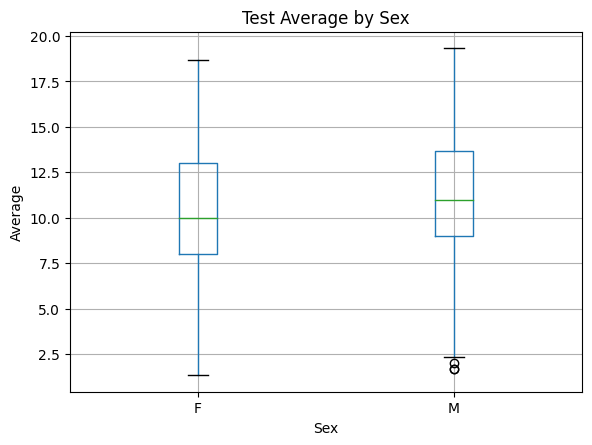

In [7]:
df.boxplot(column='average', by='sex')
plt.title('Test Average by Sex')
plt.xlabel('Sex')
plt.ylabel('Average')
plt.suptitle('')
plt.show()

Next, I want to see the relationship between weekday alcohol consumption and test averages, separated by students who do or do not want to go into higher education. The `Dalc` variable is on a 1-5 scale; 1 corresponds to very low consumption, 5 is very high.

I expected that students who do not want to go into higher education would have higher weekday alcohol consumption and lower averages.

However, I was surprised by the results and even thought I made an error somehow. There are only visible boxplots for students who do not want to go into higher education for values 1 and 2 of Weekday Alcohol Consumption. For those boxplots, their medians are lower than the "yes" value for the `higher` variable. There does not seem to be a significant relationship between Weekday Alcohol Consumption and Average for those who want to go into higher education.

Text(0.5, 0, 'Weekday Alcohol Consumption')

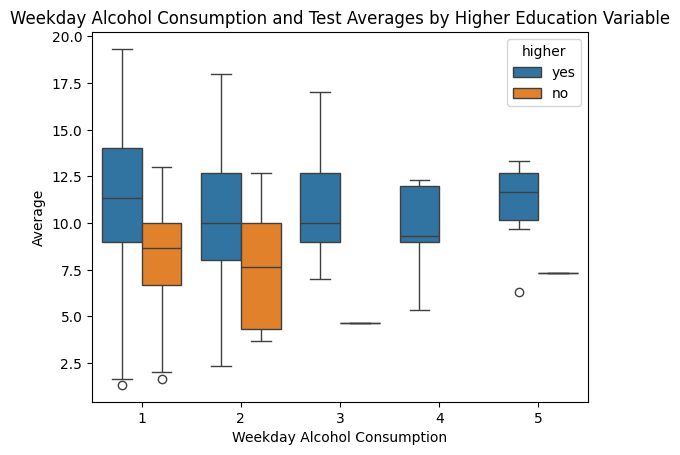

In [8]:
alc_average_higher_plot = sns.boxplot(x = df['Dalc'],
            y = df['average'],
            hue = df['higher'])
alc_average_higher_plot.set_title('Weekday Alcohol Consumption and Test Averages by Higher Education Variable')
alc_average_higher_plot.set_ylabel('Average')
alc_average_higher_plot.set_xlabel('Weekday Alcohol Consumption')

The results of the previous plot surprised me, so I wanted to take a closer look at the data. It turns out that there are few students who do not want to go into higher education. This is why there were only two clear boxplots for that variable.

In [9]:
df.groupby(['Dalc', 'higher',]).size().reset_index(name = 'counts')

,Dalc,higher,counts
0,1,no,9
1,1,yes,267
2,2,no,9
3,2,yes,66
4,3,no,1
5,3,yes,25
6,4,yes,9
7,5,no,1
8,5,yes,8


Let's continue the analysis and see how romantic partners and internet access affect math averages. My prediction was that students with internet access have higher averages compared to those without it. I also predicted that students with romantic partners have lower averages.

My predictions were relatively correct. In the internet access plot, those with internet access had the higher average values. However, the shape for is relatively bell shaped for the graph. This means that most averages are close to the mean and internet access may not have a significant relationship with math averages.

For the romantic partners graph, my prediction was also going in the right direction. For the lowest test averages, the split is about 50-50 for those with  or without a romantic partner. For higher averages, the split gets bigger in favor of those without romantic partners.

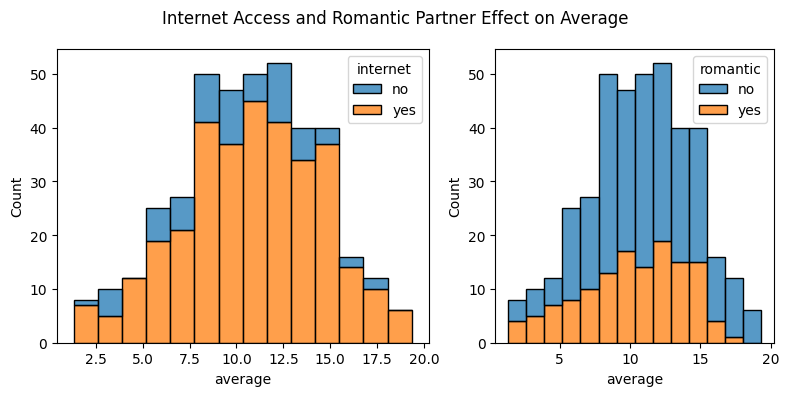

In [10]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data = df, x = 'average', hue = 'internet', multiple = 'stack', ax=axs[0])
sns.histplot(data = df, x = 'average', hue = 'romantic', multiple = 'stack', ax=axs[1])
f.suptitle('Internet Access and Romantic Partner Effect on Average')
f.tight_layout()

Next, I wanted to see the relationship between Weekend Alcohol Consumption and averages, separated by sex. I expected averages to decrease with an increase in Weekend Alcohol Consumption. I was unsure about how the `sex` variable would affect these results.

For females, the averages stay around 10 regardless of alcohol consumption. However, there is a decreasing trend for averages for males, and higher variance for males in the 4 and 5 levels of alcohol consumption.

Text(0.5, 0, 'Weekend Alcohol Consumption')

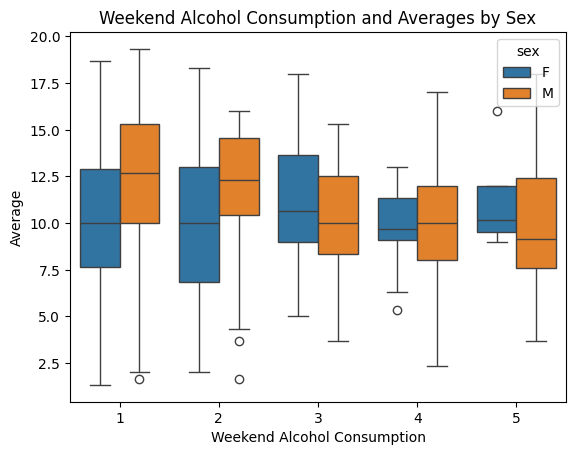

In [11]:
alc_absences_by_sex_plot = sns.boxplot(x = df['Walc'],
            y = df['average'],
            hue = df['sex'])
alc_absences_by_sex_plot.set_title('Weekend Alcohol Consumption and Averages by Sex')
alc_absences_by_sex_plot.set_ylabel('Average')
alc_absences_by_sex_plot.set_xlabel('Weekend Alcohol Consumption')

Next, let's investigate the effects of study time and travel time on test averages. I think that higher study times will lead to higher averages. I also  think that the less the student needs to travel to school, the higher their average will be.

For the highest averages, there seems to be an equal split between the study times. For the lower averages, most students study for less than two hours. These results suggest the importance of quality studying.

Students who need to travel more than an hour to school have lower averages compared to others. I think this is the case because a large travel time may stress the student. Also, it leaves less time to study for exams.

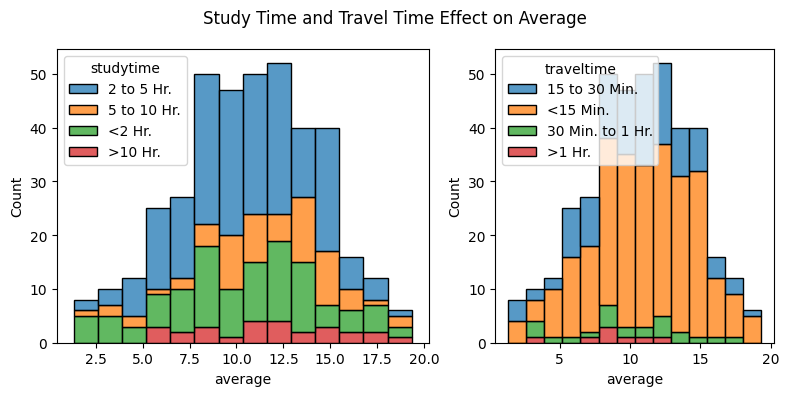

In [12]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(df, x = 'average', hue = 'studytime', multiple = 'stack', ax=axs[0])
sns.histplot(df, x = 'average', hue = 'traveltime', multiple = 'stack', ax=axs[1])
f.suptitle('Study Time and Travel Time Effect on Average')
f.tight_layout()

I also want to see how study time and travel time affect student absences. I think that students who study more time may have less absences. In addition, those who spend a lot of time traveling to school may have more absences.

At a first glance, these graphs may not be the best due to the wide variance of absences. However, it seems that study time does not have a strong relationship with absences due to the variation of categories with an increase in absences. My prediction was correct for the ">10 Hr." category. I think that absences may be related to health as opposed to study times.

For the second plot, absences are highest for those who spend less than 15 minutes traveling to school. This suggests that travel time does not have a strong relationship with absences.

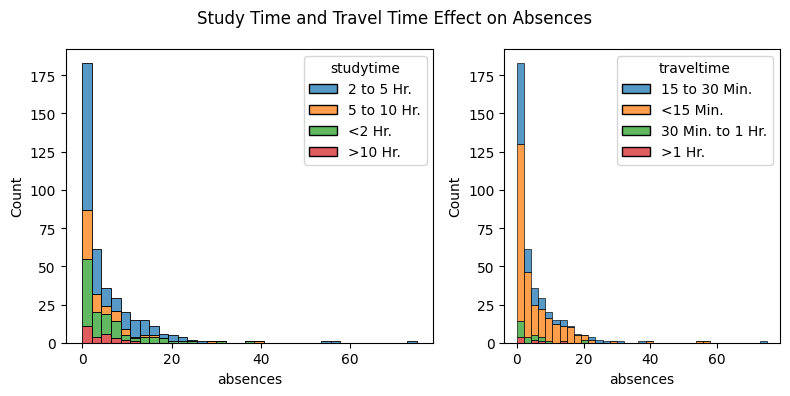

In [13]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(df, x = 'absences', hue = 'studytime', multiple = 'stack', ax=axs[0])
sns.histplot(df, x = 'absences', hue = 'traveltime', multiple = 'stack', ax=axs[1])
f.suptitle('Study Time and Travel Time Effect on Absences')
f.tight_layout()

Next, I want to see how family relations, the amount of free time, rate of going out, and overall health relate to test averages. For these variables, 1 is a low/negative result, and 5 is a high/positive result.

I think that averages will be lower for those with poorer family relations due to stress and a lack of support. I also think that those with more free time have higher averages because they may learn more quickly. For the going out variable, I predict that the higher the score, the lower their average will be. I also think that poorer health leads to lower averages.

For all of the plots, most of the medians are close to 10, regardless of the differing scale values. There is also a lot of variation, as seen by the long whiskers. The average has a slight downward trend with an increase in the `goout` variable. The results of these plots suggest that other factors are stronger in affecting student performance.

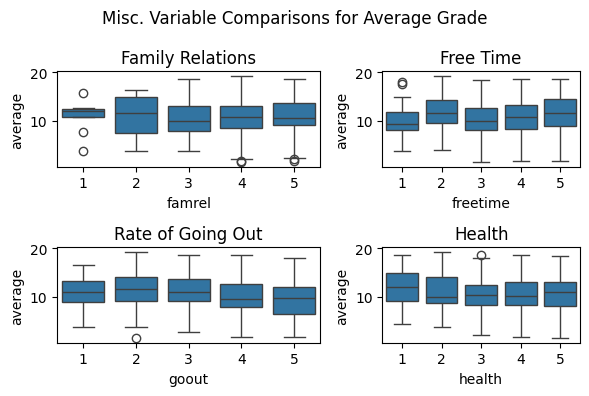

In [14]:
f, axs = plt.subplots(2, 2, figsize=(6, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x = 'famrel', y = 'average', data = df, ax=axs[0, 0])
sns.boxplot(x = 'freetime', y = 'average', data = df, ax=axs[0, 1])
sns.boxplot(x = 'goout', y = 'average', data = df, ax=axs[1, 0])
sns.boxplot(x = 'health', y = 'average', data = df, ax=axs[1, 1])
f.suptitle('Misc. Variable Comparisons for Average Grade')
axs[0,0].set_title('Family Relations')
axs[0,1].set_title('Free Time')
axs[1,0].set_title('Rate of Going Out')
axs[1,1].set_title('Health')
f.tight_layout()

Here, I want to do a quick look at the grades themselves. Perhaps one exam was more difficult than another. After making the plots, we can see that the exam and final grade medians are between 10.0-12.5. There is not an apparent trend that suggests one exam was more difficult than another. In addition, the "Average Grade" boxplot has a similar shape to the other three boxplots. This suggests that exam performance and the final grade may be used to predict the average grade.

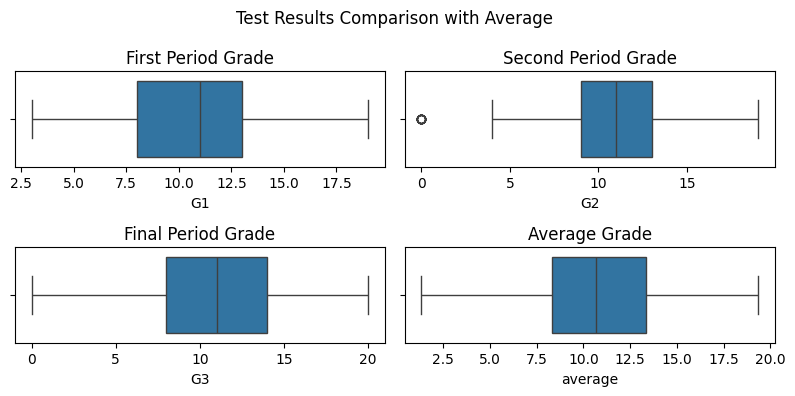

In [15]:
f, axs = plt.subplots(2, 2, figsize=(8, 4))
sns.boxplot(x = 'G1', data = df, ax=axs[0,0])
sns.boxplot(x = 'G2', data = df, ax=axs[0,1])
sns.boxplot(x = 'G3', data = df, ax=axs[1,0])
sns.boxplot(x = 'average', data = df, ax=axs[1,1])
f.suptitle('Test Results Comparison with Average')
axs[0,0].set_title('First Period Grade')
axs[0,1].set_title('Second Period Grade')
axs[1,0].set_title('Final Period Grade')
axs[1,1].set_title('Average Grade')
f.tight_layout()

Is there a relationship between students' averages and absences? I think that higher averages may be correlated with lower absences. However, with a look at this scatterplot with a line of best fit, that is not the case. The line of best fit is horizontal, suggesting there is no relationship between the two variables. Other variables must have a stronger relationship to both absences and averages instead.

Text(0.5, 0.98, 'Average Grade vs. Absences Scatterplot and Fit')

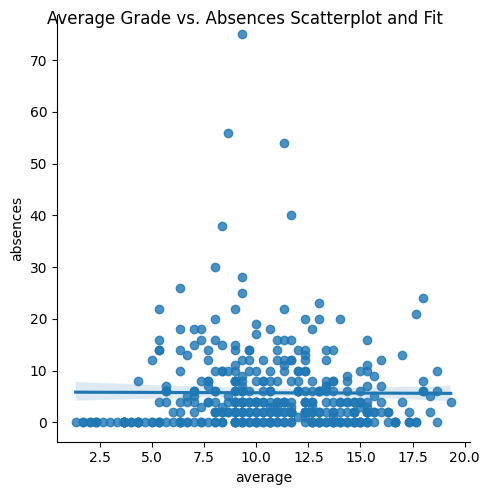

In [16]:
average_absences_plot = sns.lmplot(df, x = 'average', y = 'absences')
average_absences_plot.fig.suptitle('Average Grade vs. Absences Scatterplot and Fit')

For our last pair of plots, let's look at Weekday and Weekend Alcohol Consumption's effect on averages. Before I made the plots, I thought that higher weekday consumption would lead to lower averages.

My prediction was relatively correct. Weekday Alcohol Consumption is pretty low, and those with higher averages have lower consumption. The Weekend plot has more variation. Those with higher averages are also more likely to consume less alcohol, but there are also students with higher alcohol consumption.

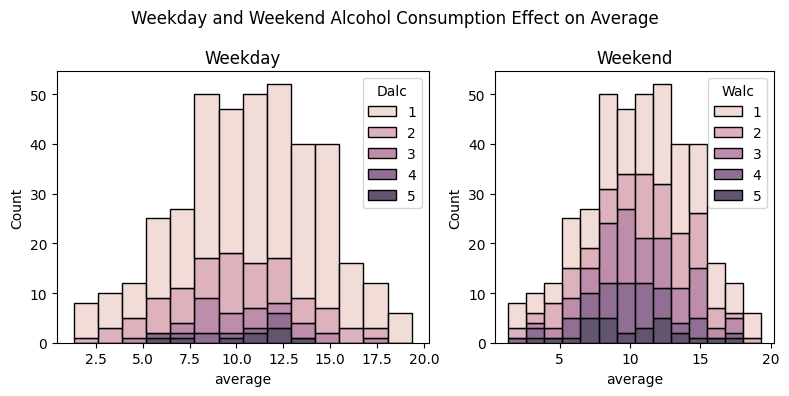

In [17]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(df, x = 'average', hue = 'Dalc', multiple = 'stack', ax=axs[0])
sns.histplot(df, x = 'average', hue = 'Walc', multiple = 'stack', ax=axs[1])
f.suptitle('Weekday and Weekend Alcohol Consumption Effect on Average')
axs[0].set_title('Weekday')
axs[1].set_title('Weekend')
f.tight_layout()

This was a very interesting dataset to analyze because it is about students from Portugal. European countries have different cultures surrounding alcohol consumption compared to the United States. Many people in Europe start drinking younger and learn how to drink without excess. I went into this analysis with a US-centric view of alcohol, where people drink to excess at parties.

I think that the drinking culture in Portugal greatly affected the results of this analysis. Students do not drink frequently, but when they do, it does not have a strong effect on their grades. The analysis of other variables such as family relations and health also did not yield a strong relationship to averages. There was an interesting relationship between averages, weekend consumption, and sex that I may explore further in a future analysis. For example, how is someone's sex related to their alcohol consumption?

For a future analysis, I may do statistical tests to see the relationships between different variables. This is a subject matter I would like to explore more, so it would be valuable to have a dataset with more numeric information compared to factor variables. This would lead to different types of graphs and more information about the subject. In addition, I may explore the variables I did not look at in this analysis.